# Dijagonalizacija kvadratnih matrica

**Sadržaj:**
1. [Sopstvene vrednosti i vektori](#Sopstvene-vrednosti-i-vektori)
1. [Dijagonalizacija](#Dijagonalizacija)
1. [Spektar i trag matrice](#Spektar-i-trag-matrice)

In [1]:
import numpy as np
import matplotlib as mplb
import matplotlib.pyplot as plt
import numpy.random as rndm

***

Korišćene bitne ugrađene NumPy funkcije:

|Dejstvo|Funkcija|
|:---|:---|
|Sopstvene vrednosti i sopstveni vektori kvadratne matrice|`numpy.linalg.eig`|
|Sopstvene vrednosti kvadratne matrice|`numpy.linalg.eigvals`|
|Koeficijenti karakterističnog polinoma matrice|`numpy.poly`|
|Šurova dekompozicija|`scipy.linalg.schur`|

***

## Sopstvene vrednosti i vektori

Za kvadratnu matricu $A\in\mathcal{M}_{n\times n}$ jednakost 
$$A(\alpha v)=\alpha Av=\lambda\alpha v,\ v\neq\theta,$$ definiše **sopstveni vektor** $v$ koji odgovara **sopstvenoj  vrednosti** $\lambda.$ Skup svih sopstvenih vrednosti matrice $A$ zovemo **spektar** te matrice i označavamo ${\rm Sp}(A).$

Sopstvene vrednosti matrice su nule njenog **karakterističnog polinoma** $P_A(\lambda)=\det(A-\lambda I).$ 

Sopstveni vektori $v$ koji odgovaraju sopstvenoj vrednosti $\lambda$ matrice $A$ su netrivijlana rešenja homogenog sistema jednačina $(A-\lambda I)v=\theta.$ Shodno tome, sopstveni vektori su ne-nula vektori jezgra matrice $A-\lambda I.$

Kada skupu svih sopstvenih vektora matrice $A$ koji odgovaraju jednoj sopstvenoj vrednosti $\lambda$ pridružimo nula-vektor dobija se vektorski potprostor koji zovemo **sopstveni potprostor** koji odgovara sopstvenoj vrednosti $\lambda,$ u oznaci $U_{\lambda}=\mathcal{N}(A-\lambda I).$ 

**Definicija 1.** Matrice $A\in\mathcal{M}_{n\times n}$ i $B\in\mathcal{M}_{n\times n}$ su **slične** ukoliko postoji regularna matrica $T\in\mathcal{M}_{n\times n}$ tako da važi
$$A=TBT^{-1}.$$

<div class="alert alert-block alert-warning">
Važno svojstvo sličnih matrica:
 <b>   
   Slične matrice imaju jednake spektre.</b> 
</div>

**Primer 1.** Na primeru konkretne slučajno generisane matrice  upoznaćemo dejstvo ugrađenih funkcija NumPy biblioteke koje su u vezi sa spektralnim svojstvima kvadratnih  matrica.

Karakteristični polinom $P_A(\lambda)=\det(A-\lambda I)$ definisan na ovaj način ima vodeći koeficijent $1$ ili $-1$ u zavisnosti od parnosti dimenzije $n$ matrice $A.$ Zbog toga se veoma često koristi **moničan karakteristični polinom** 
$$M_A(\lambda)=\det(\lambda I-A).$$ 
Polinomi $P_A$ i $M_A$ se razlikuju eventualno u znaku koeficijenata, tj. važi
$$M_A(\lambda)=(-1)^nP_A(\lambda).$$

In [2]:
n=rndm.randint(2,5)
A=rndm.rand(n,n)
M_A=np.poly(A)  #koeficijenti monicnog karakteristicnog polinoma
np.round(M_A,3)

array([ 1.   , -0.972, -0.044,  0.05 ])

Za određivanje samo sopstvenih vrednosti kvadratne matrice možemo da koristimo ugrađenu funkciju `np.linalg.eigvals`. Izlaz funkcije sadrži sopstvene vrednosti ponovljene u skladu sa njihovim višestrukostima.

In [3]:
spektar=np.linalg.eigvals(A)
np.round(spektar,3)

array([ 0.963,  0.232, -0.224])

Možemo da proverimo da li su dobijene vrednosti zaista nule karakterističnog polinoma.

In [4]:
np.round(np.polyval(M_A,spektar))

array([0., 0., 0.])

Za dijagonalnu matricu ili trougaonu matricu sopstvene vrednosti čitamo sa njihove glavne dijagonale.

In [5]:
B=np.diag([1,1,2,2,2,3])
print(B)
np.poly(B)

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 3]]


array([   1.,  -11.,   49., -113.,  142.,  -92.,   24.])

In [6]:
np.linalg.eigvals(B)

array([1., 1., 2., 2., 2., 3.])

Ukoliko je potrebno odrediti i sopstvene vektore kvadratne matrice, možemo ih dobiti ugrađenom funkcijom `np.linalg.eig`. Normirani sopstveni vektori su smešteni duž kolona izlazne matrice.

In [7]:
np.round(np.linalg.eig(A)[0],3)

array([ 0.963,  0.232, -0.224])

In [8]:
np.round(np.linalg.eig(A)[1],3)

array([[ 0.794,  0.972, -0.206],
       [ 0.318, -0.127, -0.431],
       [ 0.518, -0.197,  0.878]])

In [9]:
np.round(np.linalg.eig(B)[1],3)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

Sopstvene vrednosti i odgovarajući sopstveni vektori realnih matrica mogu da budu i kompleksni.

In [10]:
n=5
A=rndm.rand(n,n)
M_A=np.poly(A)  #koeficijenti monicnog karakteristicnog polinoma
np.round(M_A,3)

array([ 1.   , -3.288,  1.507,  0.441, -0.082, -0.021])

In [11]:
spektar=np.linalg.eig(A)[0]
np.round(spektar,3)

array([ 2.665+0.j  ,  0.748+0.j  ,  0.259+0.j  , -0.192+0.06j,
       -0.192-0.06j])

In [12]:
np.abs(np.linalg.eig(A)[0])

array([2.6647712 , 0.74834971, 0.25908657, 0.20143793, 0.20143793])

Primećujemo da sopstvene vrednosti ne moraju da budu uvek poređane po opadajućim modulima u izlazu odgovarajućih funkcija. Kompleksnim sopstvenim vrednostima odgovaraju kompleksni sopstveni vektori.

In [13]:
np.round(np.linalg.eig(A)[1],3)

array([[ 0.223+0.j   ,  0.767+0.j   , -0.029+0.j   , -0.409+0.01j ,
        -0.409-0.01j ],
       [ 0.479+0.j   , -0.229+0.j   , -0.182+0.j   ,  0.106-0.126j,
         0.106+0.126j],
       [ 0.531+0.j   , -0.59 +0.j   , -0.558+0.j   , -0.598+0.011j,
        -0.598-0.011j],
       [ 0.561+0.j   ,  0.092+0.j   ,  0.803+0.j   ,  0.267+0.101j,
         0.267-0.101j],
       [ 0.352+0.j   , -0.057+0.j   ,  0.099+0.j   ,  0.605+0.j   ,
         0.605-0.j   ]])

Kao što možemo da primetimo iz primera prethodne matrice, vektor sopstvenih vrednosti se vraća u kompleksnom formatu. Zbog toga je problematično prepoznati koje su sopstvene vrednosti realne, a koje pravi kompleksni brojevi. Osim toga, predstavljene ugrađene funkcije unose velike netačnosti u izračunavanja sa porastom dimenzije matrice. 

Funkcija koja se preporučuje za utvrđivanje realnih sopstvenih vrednosti nesimetrične kvadratne matrice nalazi se u biblioteci SciPy. Tiče se [Šurove dekompozicije](https://en.wikipedia.org/wiki/Schur_decomposition) matrica, tj. predstavljanja matrice u obliku $A=QRQ^T$ gde je $Q$ ortogonalna transformacija sličnosti, a $R$ je blok gornje trougaona matrica. 

In [14]:
from scipy.linalg import schur

In [15]:
n=10
A=rndm.rand(n,n)

In [16]:
R,_=schur(A)
print(np.round(R,2))
print(np.round(np.linalg.eigvals(A),2))

[[ 5.43  0.22 -0.28 -0.35  0.24  0.2  -0.13 -0.53 -0.16 -0.56]
 [ 0.    0.78  0.17  0.06  0.26  0.09 -0.63 -0.3   0.26 -0.02]
 [ 0.   -0.03  0.78 -0.51 -0.04 -0.06  0.25  0.01  0.3  -0.26]
 [ 0.    0.    0.    0.12  0.41  0.32  0.07  0.27  0.22  0.03]
 [ 0.    0.    0.   -1.15  0.12  0.39 -0.03  0.12 -0.3   0.01]
 [ 0.    0.    0.    0.    0.   -0.64 -0.55 -0.64  0.4  -0.04]
 [ 0.    0.    0.    0.    0.    0.18 -0.64 -0.29 -0.22 -0.02]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.08 -0.52 -0.04]
 [ 0.    0.    0.    0.    0.    0.    0.    0.09 -0.08  0.13]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.12]]
[ 5.43+0.j    0.78+0.07j  0.78-0.07j  0.12+0.69j  0.12-0.69j -0.64+0.31j
 -0.64-0.31j -0.08+0.21j -0.08-0.21j -0.12+0.j  ]


U matrici $R$ primećujemo blokove oko glavne dijagonale veličine 1 ili 2. Svaki blok veličine 1 znači realnu sopstvenu vrednost. Svaki blok veličine 2 znači par konjugovano kompleksnih sopstvenih vrednosti. Ovako čitani blokovi sopstvenih vrednosti mogu da daju tačnije informacije nego ograđene funkcije NumPy biblioteke.

***

**Definicija 2.** Za matricu $A$ spektralni radijus (poluprečnik), u oznaci $\rho(A)$ je
    $$\rho(A)=\max\big\{|\lambda|\ \big|\ \lambda\in{\rm Sp}(A)\big\}.$$

Spektralni radijus predstavlja poluprečnik centralne kružnice (kružnice sa centrom u koordinatnom početku kompleksne ravni) koja obuhvata sve sopstvene vrednosti matrice $A.$ Kružnica $K_{\rho(A)}=\big\{|z|\ \big|\ |z|\leq\rho(A)\big\}$ naziva se spektralna kružnica matrice $A.$
<div>
   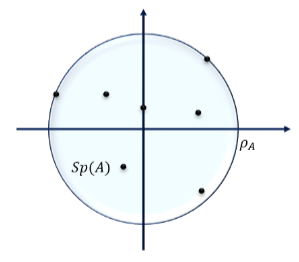  
</div>

***

## Dijagonalizacija

Neka je data matrica $A\in\mathcal{M}_{n\times n}$ sa poznatim sopstvenim parovima $\lambda_i,v_i,\ i=0,1,\dots,k.$ Skup jednakosti $Av_i=\lambda_iv_i,\ i=0,1,\dots,k,$ može se prikazati u matričnom obliku.
\begin{align}
A\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
v_0&v_1&\dots&v_k\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]&
=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
Av_0&Av_1&\dots&Av_k\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]\\
&=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
\lambda_0v_0&\lambda_1v_1&\dots&\lambda_kv_k\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
v_0&v_1&\dots&v_k\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]\begin{bmatrix} \lambda_0&0&\dots&0\\0&\lambda_1&\dots&0\\&&\ddots&\\
0&0&\dots&\lambda_k\end{bmatrix},
\end{align}

ili kraće zapisano $AV=VD,$ gde su $V=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
v_0&v_1&\dots&v_k\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]\mbox{ i }
D=\begin{bmatrix} \lambda_0&0&\dots&0\\0&\lambda_1&\dots&0\\&&\ddots&\\
0&0&\dots&\lambda_k\end{bmatrix}.$

Ukoliko je $V$ regularna matrica, tj. kada matrica $A$ poseduje sopstvene vektore $v_0,v_1,\dots,v_{n-1},$ koji obrazuju bazu prostora $\mathbb{R}^n,$ tada je 
$$A\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
v_0&v_1&\dots&v_{n-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]=
\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
v_0&v_1&\dots&v_{n-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]\begin{bmatrix} \lambda_0&0&\dots&0\\0&\lambda_1&\dots&0\\&&\ddots&\\
0&0&\dots&\lambda_{n-1}\end{bmatrix}
.$$
Odatle je
$$
A=VDV^{-1},\qquad D=V^{-1}AV.
$$
Gornje jednakosti  opisuju  dijagonalizaciju kvadratne matrice $A,$ tj. njenu spektralnu dekompoziciju. Kada je dijagonalizacija matrice $A$ moguća kažemo da je $A$ slična dijagonalnoj matrici $D.$ 

**Primer 2.** Jedna od mogućih prednosti postojanja dijagonalizacije matrice jeste njeno brzo stepenovanje.

$A^2=(VDV^{-1})(VDV^{-1})=VD^2V^{-1}\quad\Longrightarrow\quad A^s=VD^sV^{-1}$

In [17]:
n=3
A=rndm.rand(n,n)
np.linalg.eigvals(A)

array([ 1.8236124 ,  0.12894955, -0.28811012])

Kada matrica poseduje sve različite sopstvene vrednosti onda za nju sigurno poseduje dijagonalizacija.

In [18]:
D,V=np.linalg.eig(A)

In [19]:
np.round(A-(V*D)@np.linalg.inv(V),3)

array([[ 0.,  0.,  0.],
       [-0.,  0., -0.],
       [ 0.,  0.,  0.]])

In [20]:
np.round(A@A-(V*D**2)@np.linalg.inv(V),3)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

***

**Primer 3.** Ne poseduju sve matrice dijagonalizaciju, tj. baza sastavljena od sopstvenih vektora ne mora da postoji za svaku kvadratnu matricu. Najjednostavniji primer takvih matrica su pojedine trougaone matrice.

In [21]:
R=np.array([[1.,1,1],[0,1,1],[0,0,2]])
np.round(np.linalg.eig(R)[0],2) , np.round(np.linalg.eig(R)[1],2)

(array([1., 1., 2.]),
 array([[ 1.  , -1.  ,  0.82],
        [ 0.  ,  0.  ,  0.41],
        [ 0.  ,  0.  ,  0.41]]))

Nemogućnost dijagonalizacije prepoznajemo u izlazu sopstvenih vektora koji su linearno zavisni. Prva i druga kolona matrice sopstvenih vektora u ovom slučaju su linearno zavisni vektori.

***

Kada matrica $A$ poseduje dijagonalizaciju iz nje možemo da pročitamo bazu prostora slika i jezgra matrice $A.$ Sopstveni vektori (kolone matrice $V$) koji odgovaraju nenula sopstvenim vektorima čine bazu prostora slika. Slično, sopstveni vektori (kolone matrice $V$) koji odgovaraju sopstvenoj vrednosti $\lambda=0$ generišu jezgro matrice $A.$

**Primer 4.** Kroz grafički prikaz u ravni na konkretnim primerima razvijamo geometrijsku intuiciju iza pojmova sopstvenih vrednosti, vektora i determinanti tako što matrice tretiramo kao linearna preslikavanja $v\mapsto Av.$ Posmatraćemo transformaciju jediničnog kvadrata i jedinične kružnice pod dejstvom nekoliko različitih matrica. U te svrhe najpre definišiemo funkciju za izvršenje odgovarajućih izračunavanja i grafički prikaz.

In [22]:
def transformacija(A):
    n=100
    crte=np.arange(-2,3,1)
    t=np.linspace(-1,1,n)
    X,Y=np.meshgrid(t,t)
    kvadrat=np.block([[X.reshape(n*n,)],[Y.reshape(n*n,)]])
    kvr1=A@kvadrat
    
    
    X,Y=np.meshgrid(t,t)
    X=X.reshape(n*n,)
    Y=Y.reshape(n*n,)
    pom=(np.abs(X)**2+np.abs(Y)**2<=1)
    krug=np.block([[X[pom]],[Y[pom]]])
    kruz1=A@krug
    
    slika, ax = plt.subplots(2, 2,figsize=(6,6))
    slika.subplots_adjust(hspace=0.5,wspace=0.5)

    plt.subplot(2, 2, 1) 
    plt.title("Jedinični kvadrat") 
    plt.plot(kvadrat[0],kvadrat[1],alpha=0.3)
    plt.xlabel('X osa')
    plt.ylabel('Y osa')
    plt.xlim([-2.5, 2.5])
    plt.ylim([-2.5, 2.5])
    plt.xticks(crte)
    plt.yticks(crte)
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.grid();

    plt.subplot(2, 2, 2) 
    plt.title("A transformacija") 
    plt.plot(kvr1[0],kvr1[1],alpha=0.3)
    plt.xlabel('X osa')
    plt.ylabel('Y osa')
    plt.xlim([-2.5, 2.5])
    plt.ylim([-2.5, 2.5])
    plt.xticks(crte)
    plt.yticks(crte)
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.grid();

    plt.subplot(2, 2, 3) 
    plt.title("Jedinična kružnica") 
    plt.plot(krug[0],krug[1],alpha=0.3)
    plt.xlabel('X osa')
    plt.ylabel('Y osa')
    plt.xlim([-2.5, 2.5])
    plt.ylim([-2.5, 2.5])
    plt.xticks(crte)
    plt.yticks(crte)
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.grid();

    plt.subplot(2, 2, 4) 
    plt.title("A transformacija") 
    plt.plot(kruz1[0],kruz1[1],alpha=0.3)
    plt.xlabel('X osa')
    plt.ylabel('Y osa')
    plt.xlim([-2.5, 2.5])
    plt.ylim([-2.5, 2.5])
    plt.xticks(crte)
    plt.yticks(crte)
    plt.axhline(color='black', zorder=-1)
    plt.axvline(color='black', zorder=-1)
    plt.grid();

a) Analiziramo prvo transformaciju indukovanu dijagonalnom matricom $A_1=\begin{bmatrix}1/2&0\\0&2\end{bmatrix}.$ Sopstvene vrednosti ove matrice su upravo dijagonalni elementi ${\rm Sp}(A_1)=\{1/2,2\},$ a odgovarajući sopstveni potprostori leže na koordinatnim osama
$$U_{1/2}=\mathcal{L}(\begin{bmatrix}1&0\end{bmatrix}^T),\qquad
U_{2}=\mathcal{L}(\begin{bmatrix}0&1\end{bmatrix}^T).$$

In [23]:
A1=np.diag([1/2,2])
np.linalg.eig(A1)

(array([0.5, 2. ]),
 array([[1., 0.],
        [0., 1.]]))

Kako je determinanta matrice $A_1$ jednaka $1,$ to ova transformacija čuva površinu paralelograma.

In [24]:
np.linalg.det(A1)

1.0

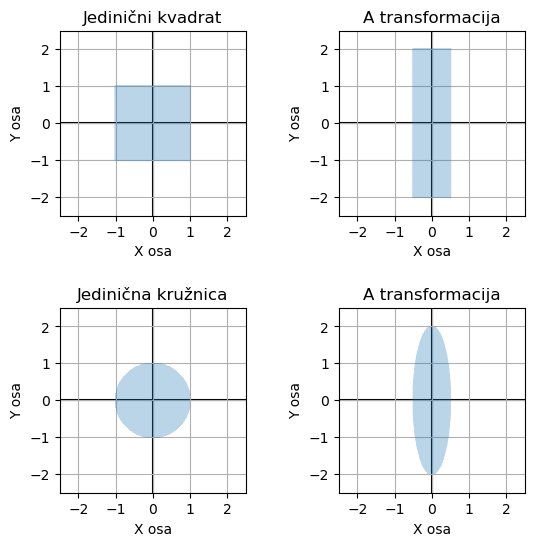

In [25]:
transformacija(A1)

Vidimo da sopstveni vektori opisuju pravce najvećeg i najmanjeg istezanja vektora pod dejstvom matrice $A_1.$

b) Sledeća matrica koju analiziramo je gornje trougaona $A_2=\begin{bmatrix}1&1/2\\0&1\end{bmatrix}.$ Ova matrica ima jednu dvostruku sopstvenu vrednost, ali samo jedan sopstveni vektor. Ova matrica ne poseduje dijagonalizaciju. Zbog toga ugrađena naredba vraća dve iste kolone sopstvenih vektora.

In [26]:
A2=np.array([[1,1/2],[0,1]])
np.linalg.eig(A2)

(array([1., 1.]),
 array([[ 1.0000000e+00, -1.0000000e+00],
        [ 0.0000000e+00,  4.4408921e-16]]))

Zaključujemo da potprostor $U_{1}=\mathcal{L}(\begin{bmatrix}1&0\end{bmatrix}^T)$ ostaje nepokretan pod dejstvom matrice $A_2$ dok se svi ostali pravci menjaju. Konkretno, drugi koordinatni vektor se slika u drugu kolonu matrice $A_2.$ Ovakve transformacije zovemo smicanje ili zakošenje. S obzirom na vrednost determinante zaključujemo da se površina kvadrata ne menja pod dejstvom transformacije.

In [27]:
np.linalg.det(A2)

1.0

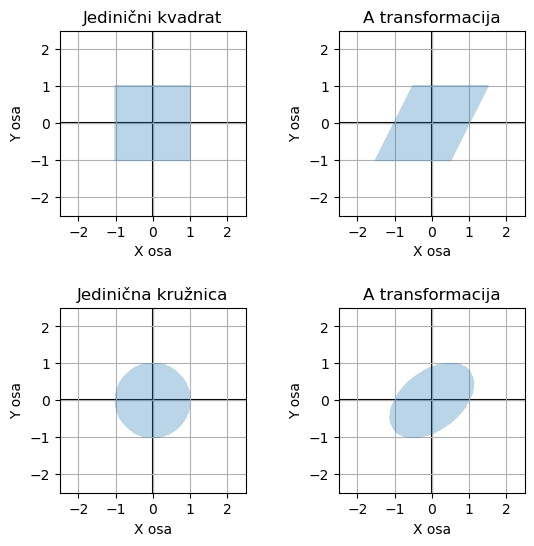

In [28]:
transformacija(A2)

c) Sledeća je ortogonalna transformacija. Iskoristićemo ugrađenu biblioteku za generisanje slučajne orotogonalne matrice željene dimenzije.

In [29]:
from scipy.stats import ortho_group

In [30]:
A3=ortho_group.rvs(2)
np.linalg.eig(A3)

(array([0.38033823+0.92484747j, 0.38033823-0.92484747j]),
 array([[-7.07106781e-01+0.j        , -7.07106781e-01-0.j        ],
        [ 1.34015774e-16+0.70710678j,  1.34015774e-16-0.70710678j]]))

In [31]:
np.abs(np.linalg.eigvals(A3))

array([1., 1.])

In [32]:
np.linalg.det(A3)

0.9999999999999999

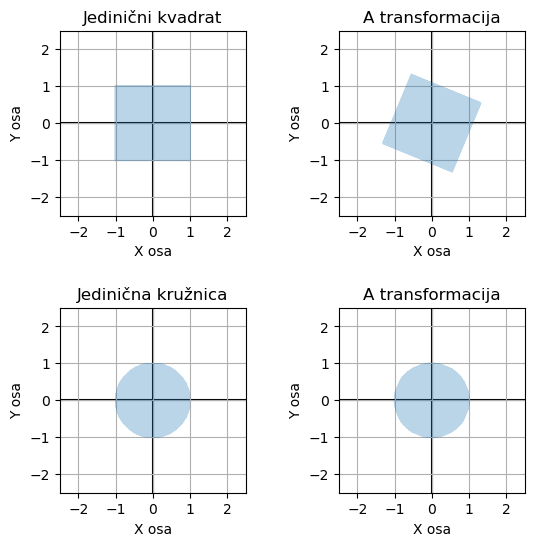

In [33]:
transformacija(A3)

Ortogonalne transformacije vrše izometrijske transformacije prostora koje u opštem slučaju zovemo rotacije. U 2D i 3D geometrijama ortogonalne transformacije definišu i refleksije i rotacije.

d) Naredna matrica je singularna, $A_4=\begin{bmatrix}1&-1\\-1&1\end{bmatrix}.$

In [34]:
A4=np.array([[1,-1],[-1,1]])
np.linalg.eig(A4)

(array([2., 0.]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [35]:
np.linalg.det(A4)

0.0

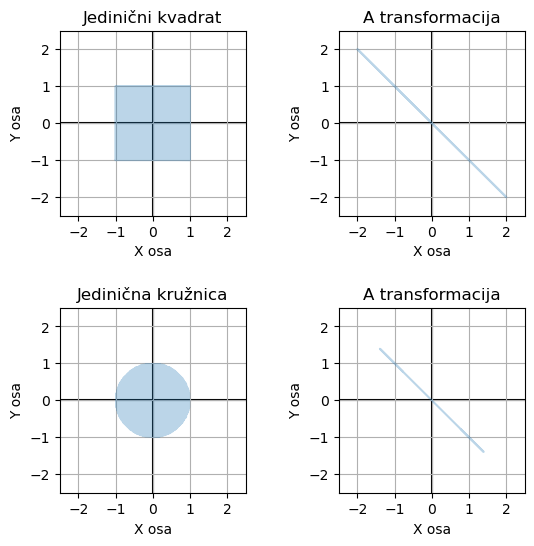

In [36]:
transformacija(A4)

Singularnim matricama se gube dimenzije prelaskom iz domena u prostor slika.

***

Singularnost matrica možemo da detektujemo preko postojanja nula sopstvenih vrednosti.

**Primer 5.** Potražimo sopstvene vrednosti matrice $B=\begin{bmatrix}1&-1&0\\-1&2&-1\\0&-1&1\end{bmatrix}.$

In [37]:
B=np.array([[1,-1,0],[-1,2,-1],[0,-1,1]])
np.round(np.linalg.eigvals(B),2)

array([ 3.,  1., -0.])

Zaključujemo da je matrica $B$ singularna s obzirom da je treća sopstvena vrednost bliska $0.$

Još jedan način da proverimo treću sopstvenu vrednost je izračunavanjem karakterističnog polinoma matrice $B.$ Kako matrica $B$ ima sve elemente cele brojeve, to i njen karakteristični polinom mora biti sa celobrojnim koeficijentima.

In [38]:
PB=np.poly(B)
print(PB)
print(np.round(PB))

[ 1.00000000e+00 -4.00000000e+00  3.00000000e+00  1.54158147e-16]
[ 1. -4.  3.  0.]


Izlaz naredbe `numpy.poly` je vektor koeficijenata polinoma navedenih počevši od najstarijeg. Drugim rečima dobijeni vektor predstavlja karakteristični polinom $P_B(\lambda)=\lambda^3-4\lambda^2+3\lambda.$ Poslednji, tj. slobodan koeficijent karakterističnog polinoma je jasno jednak $0.$ Na taj način potvrđujemo i da je tačno jedna sopstvena vrednost jednaka $0.$

***

## Spektar i trag matrice

Temu sopstvenih vrednosti i vektora kvadratnih matrica završavamo veoma važnom vezom spektra i traga matrice.

**Teorema 1.**     Za kvadratnu matricu $A=[a_{ij}]$ reda $n$ sa sopstvenim vrednostima $\lambda_0,\lambda_1,\dots,\lambda_{n-1},$ važi
$$
	a_{00}+a_{11}+\dots+a_{n-1\,n-1}={\rm tr}(A)=\lambda_0+\lambda_1+\dots+\lambda_{n-1}.$$

**DOKAZ:**

Karakteristični polinom matrice $A\in\mathcal{M}_{n\times n}$
	glasi 
$$P_A(\lambda)=\det(A-\lambda I)=
	\begin{vmatrix} a_{00}-\lambda&a_{01}&a_{02}&\dots&a_{0\,n-1}\\
	a_{10}&a_{11}-\lambda&a_{12}&\dots&a_{1\,n-1}\\
	a_{20}&a_{21}&a_{22}-\lambda&\dots&a_{2\,n-1}\\
	\vdots&\vdots&\vdots&\ddots &\vdots\\ 
    a_{n-1\,0}&a_{n-1\,1}&a_{n-1\,2}&\dots&a_{n-1\,n-1}-\lambda\end{vmatrix}.$$
Sopstvene vrednosti $\lambda_0,\lambda_1,\dots,\lambda_{n-1},$ matrice $A$ su nule karakterističnog polinoma. Zbog toga je faktorizacija polinoma $P_A(\lambda)$ 
$$ P_A(\lambda)=\det(A-\lambda I)=(\lambda_0-\lambda)(\lambda_1-\lambda)\cdots(\lambda_{n-1}-\lambda).$$	

Razvijanjem desne strane u prethodnoj jednakosti dobijamo Vijetove formule
	$$\det(A-\lambda I)=(-\lambda)^n+(-\lambda)^{n-1}(\lambda_0+\lambda_1+\dots+\lambda_{n-1})+\dots+\lambda_0\lambda_1\cdots\lambda_{n-1}.$$
Potražimo koeficijent uz $(-\lambda)^{n-1}$ na osnovu dterminante karakterističnog polinoma. Laplasovim razvojem po prvoj koloni determinante  nalazimo:
$$P_A(\lambda)=(a_{00}-\lambda)\begin{vmatrix} a_{11}-\lambda&a_{12}&\dots&a_{1\,n-2}&a_{1\,n-1}\\
	a_{21}&a_{22}-\lambda&\dots&a_{2\,n-2}&a_{2\,n-1}\\
	\vdots&\vdots&\ddots &\vdots&\vdots\\
	a_{n-2\,1}&a_{n-2\,2}&\dots&a_{n-2\,n-2}-\lambda&a_{n-2\,n-1}\\ 
    a_{n-1,1}&a_{n-1\,2}&\dots&a_{n-1\,n-2}&a_{n-1\,n-1}-\lambda\end{vmatrix}+
    \sum_{k=1}^{n-1}a_{k0}A_{k0}(\lambda),$$
tj.
$$
P_A(\lambda)=(a_{00}-\lambda)P_{A_{00}}(\lambda)
	+\sum_{k=1}^{n-1}a_{k0}A_{k0}(\lambda).$$
Kako su svi kofaktori $A_{k0}(\lambda),\ k=1,\dots,n-1,$ polinomi stepena ne većeg od $n-2$ (nedostaju im članovi $a_{00}-\lambda$ i $a_{kk}-\lambda$), to se traženi koeficijent uz $(-\lambda)^{n-1}$ nalazi u prvom sabirku Laplasovog razvoja. Nastavljajući Laplasov razvoj na determinanti $P_{A_{00}}(\lambda),$ analogno prethodnom objašnjenju dolazimo do zaključka da je koeficijent uz $(-\lambda)^{n-1}$ karakterističnog polinoma isti kao  koeficijent uz $(-\lambda)^{n-1}$ u proizvodu dijagonalnih elemenata $(a_{00}-\lambda)(a_{11}-\lambda)\cdots(a_{n-1\,n-1}-\lambda).$ Dakle koeficijent iznosi $a_{00}+a_{11}+\dots+a_{n-1\,n-1}={\rm tr}(A).$

***